# Hotel Booking Use Case

## Importing the data and relevant libraries

In [13]:
#Importing the relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [10]:
#Importing data
data = pd.read_csv(r"data\hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Missing Values

### Missing value analysis

In [87]:
#Checking dataset for missing values
data.isnull().sum().sort_values(ascending=False)*100/len(data)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

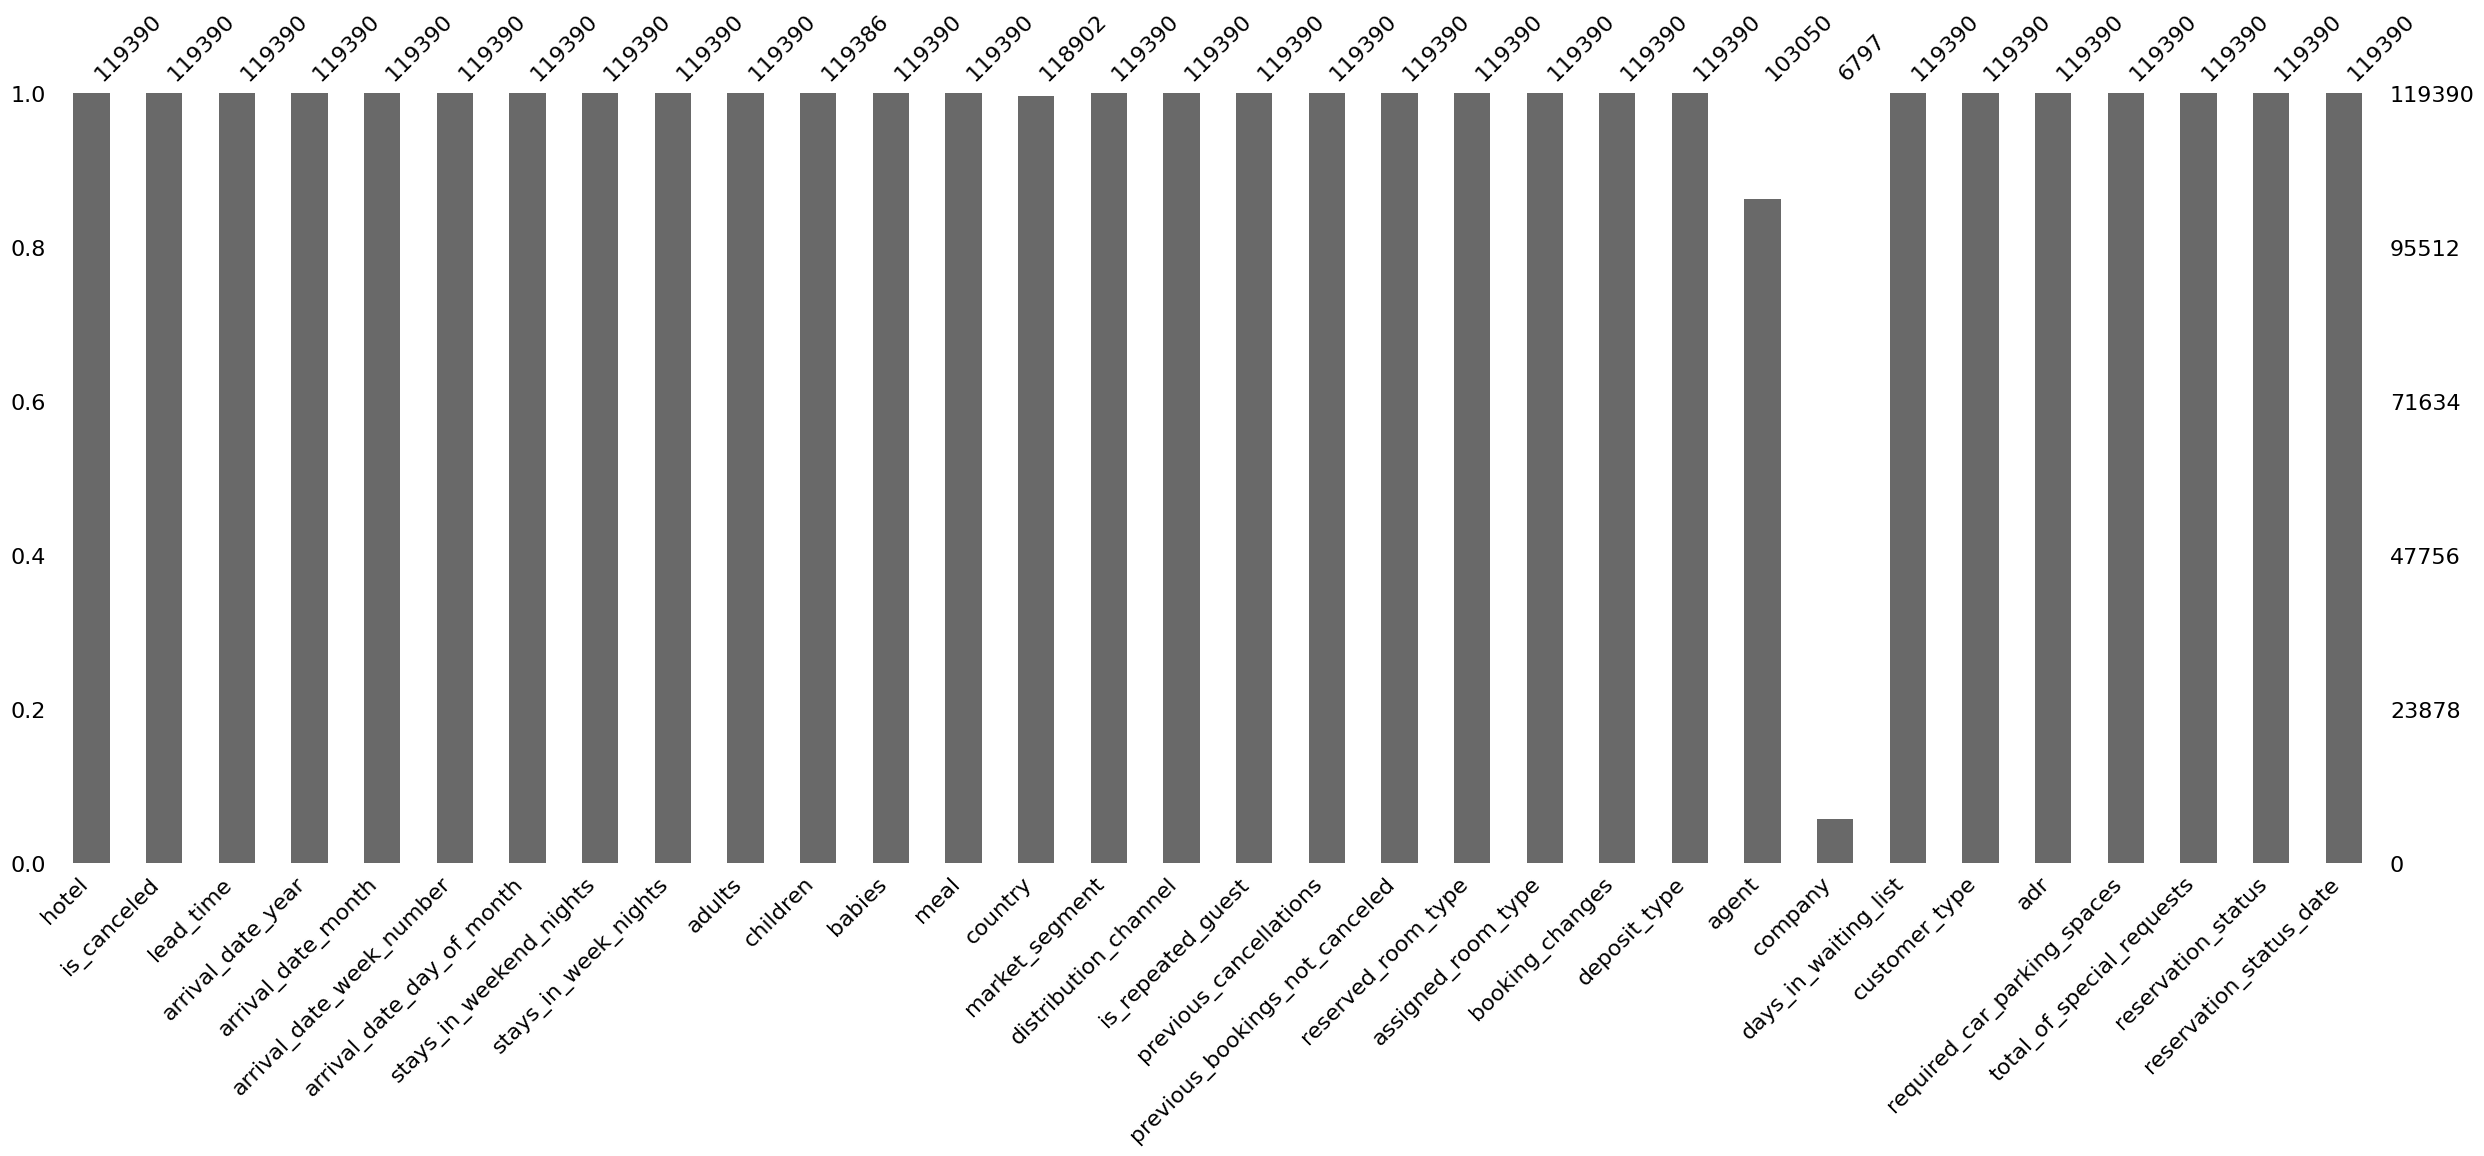

In [57]:
#Visualizing missing data
msno.bar(df=data, figsize=(30, 10))
plt.show()

It appears that four variables, "children", "country", "agent" and "company" has missing data.

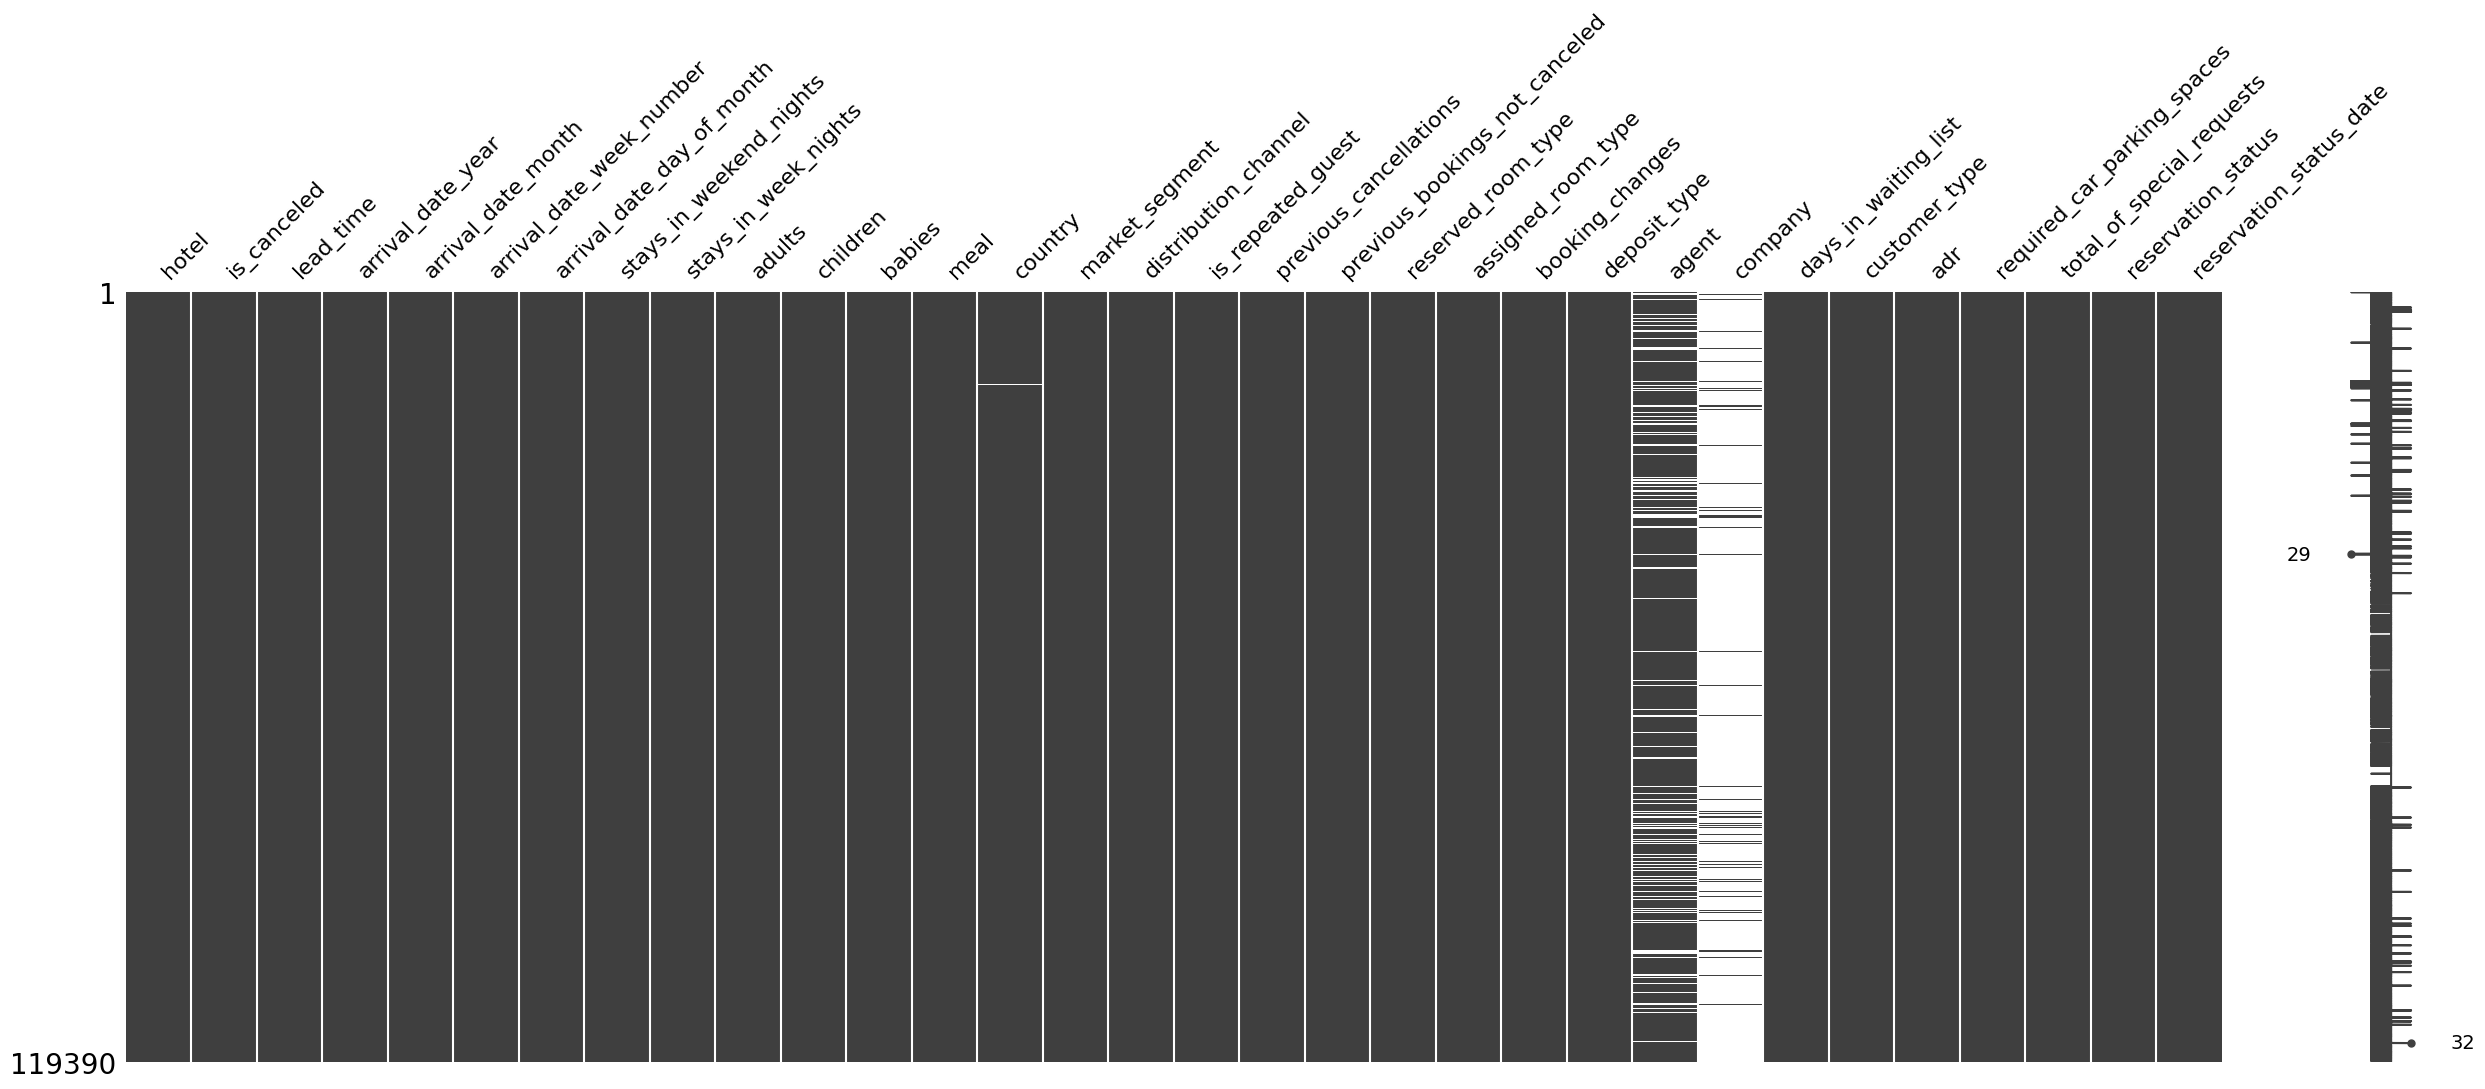

In [61]:
#Visualizing the pattern of missing data
msno.matrix(data, figsize=(30,10))
plt.show()

As shown in the figure above, there are no visible patterns in the missing data. However, further analysis is conducted to determine whether variables are MAR, MCAR or MNAR.

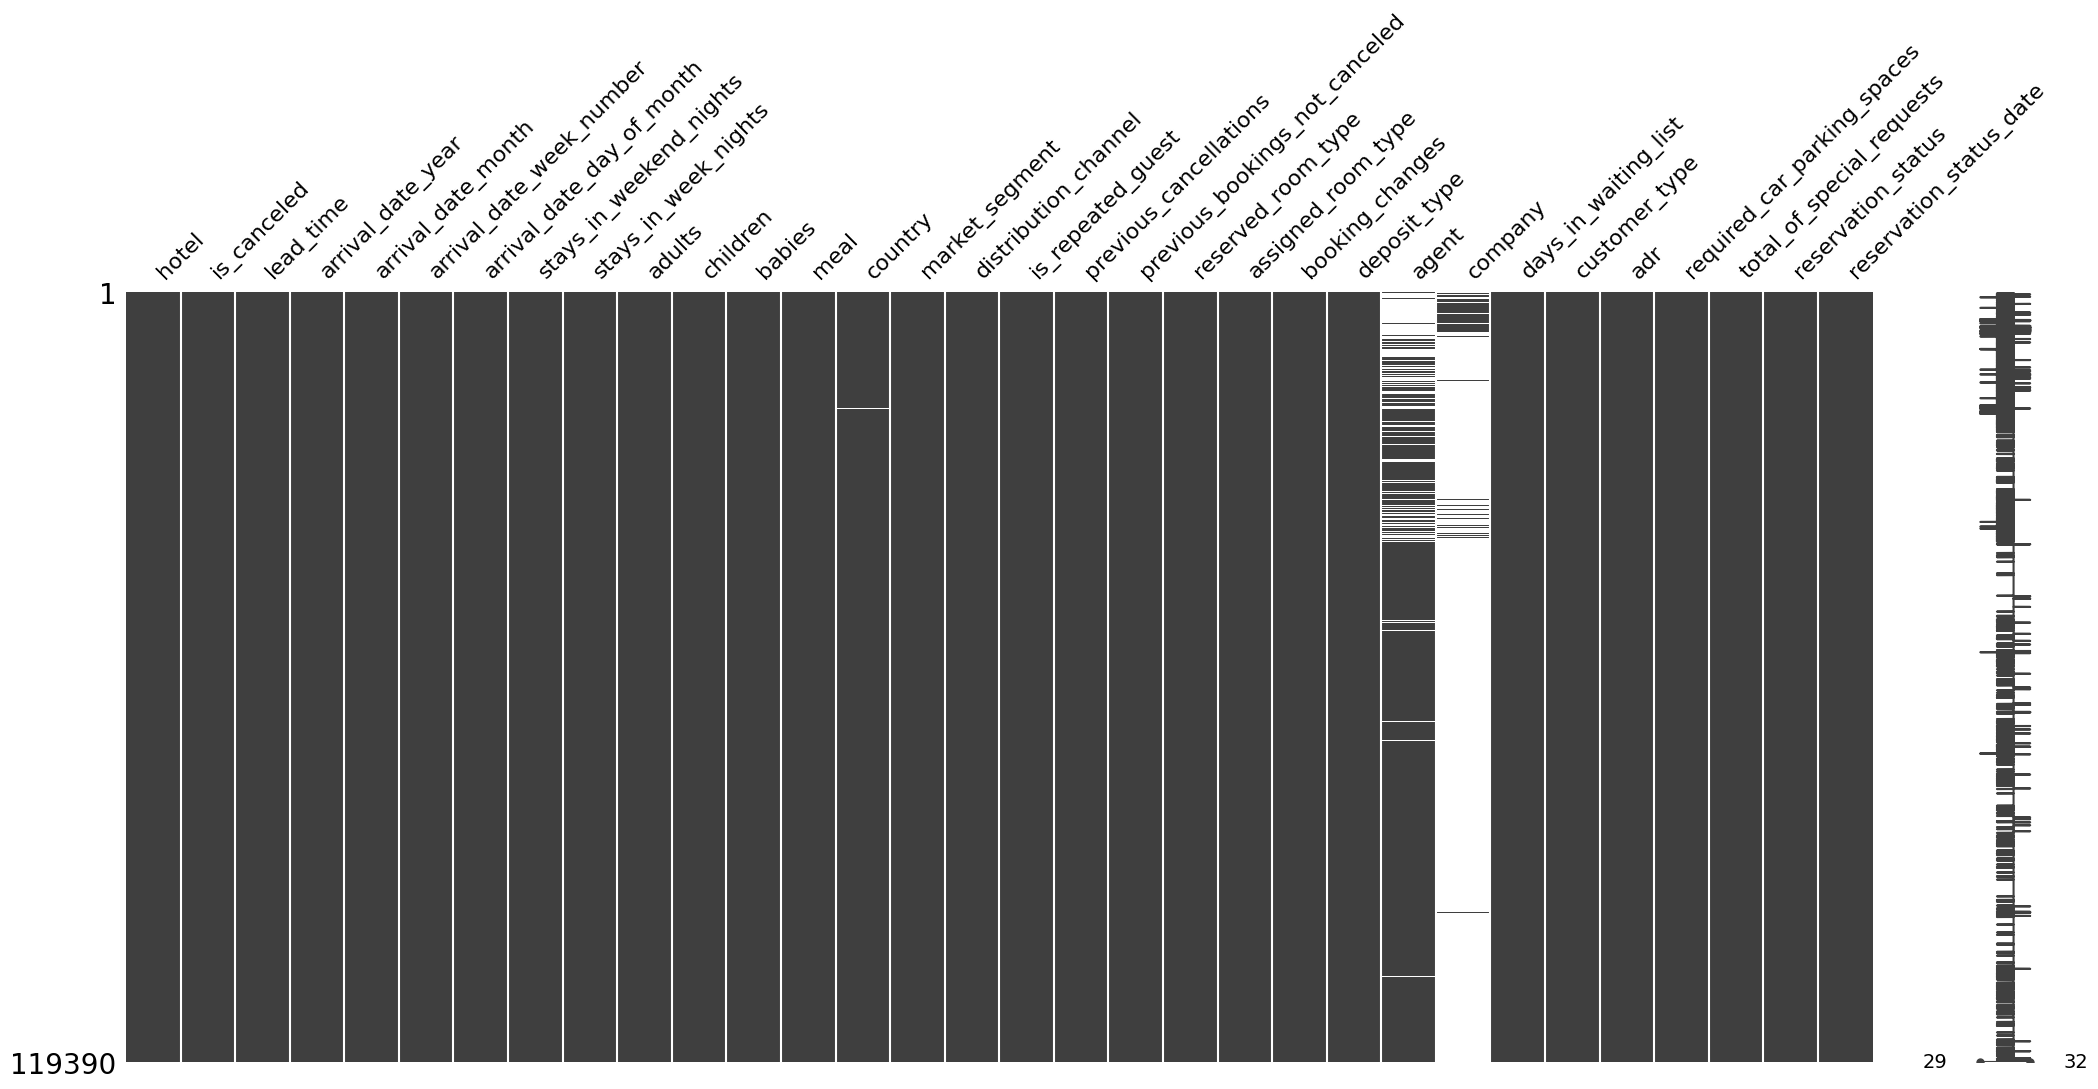

In [62]:
#Checking if missing values are a result of market segment
sorted_data = data.sort_values("market_segment")
msno.matrix(sorted_data)
plt.show()

There appears to be more of a pattern in "agent" and "company" column when the dataset is sorted by market segment. Further breakdown is required to understand this relationship

In [63]:
#Printing the number of missing values in "company" column based on market segment
for i in data.market_segment.unique():
    print(f"{i}: {data.loc[data.market_segment==i]['company'].isna().sum()}")

Direct: 12398
Corporate: 824
Online TA: 56381
Offline TA/TO: 24113
Complementary: 430
Groups: 18420
Undefined: 2
Aviation: 25


In [64]:
#Printing the number of missing values in "company" column based on market segment
for i in data.market_segment.unique():
    print(f"{i}: {data.loc[data.market_segment==i]['agent'].isna().sum()}")

Direct: 6007
Corporate: 4594
Online TA: 348
Offline TA/TO: 389
Complementary: 640
Groups: 4148
Undefined: 2
Aviation: 212


Following breakdown of market segment, there appears to be no reliable pattern in the missing values for "company" and "agent" column.

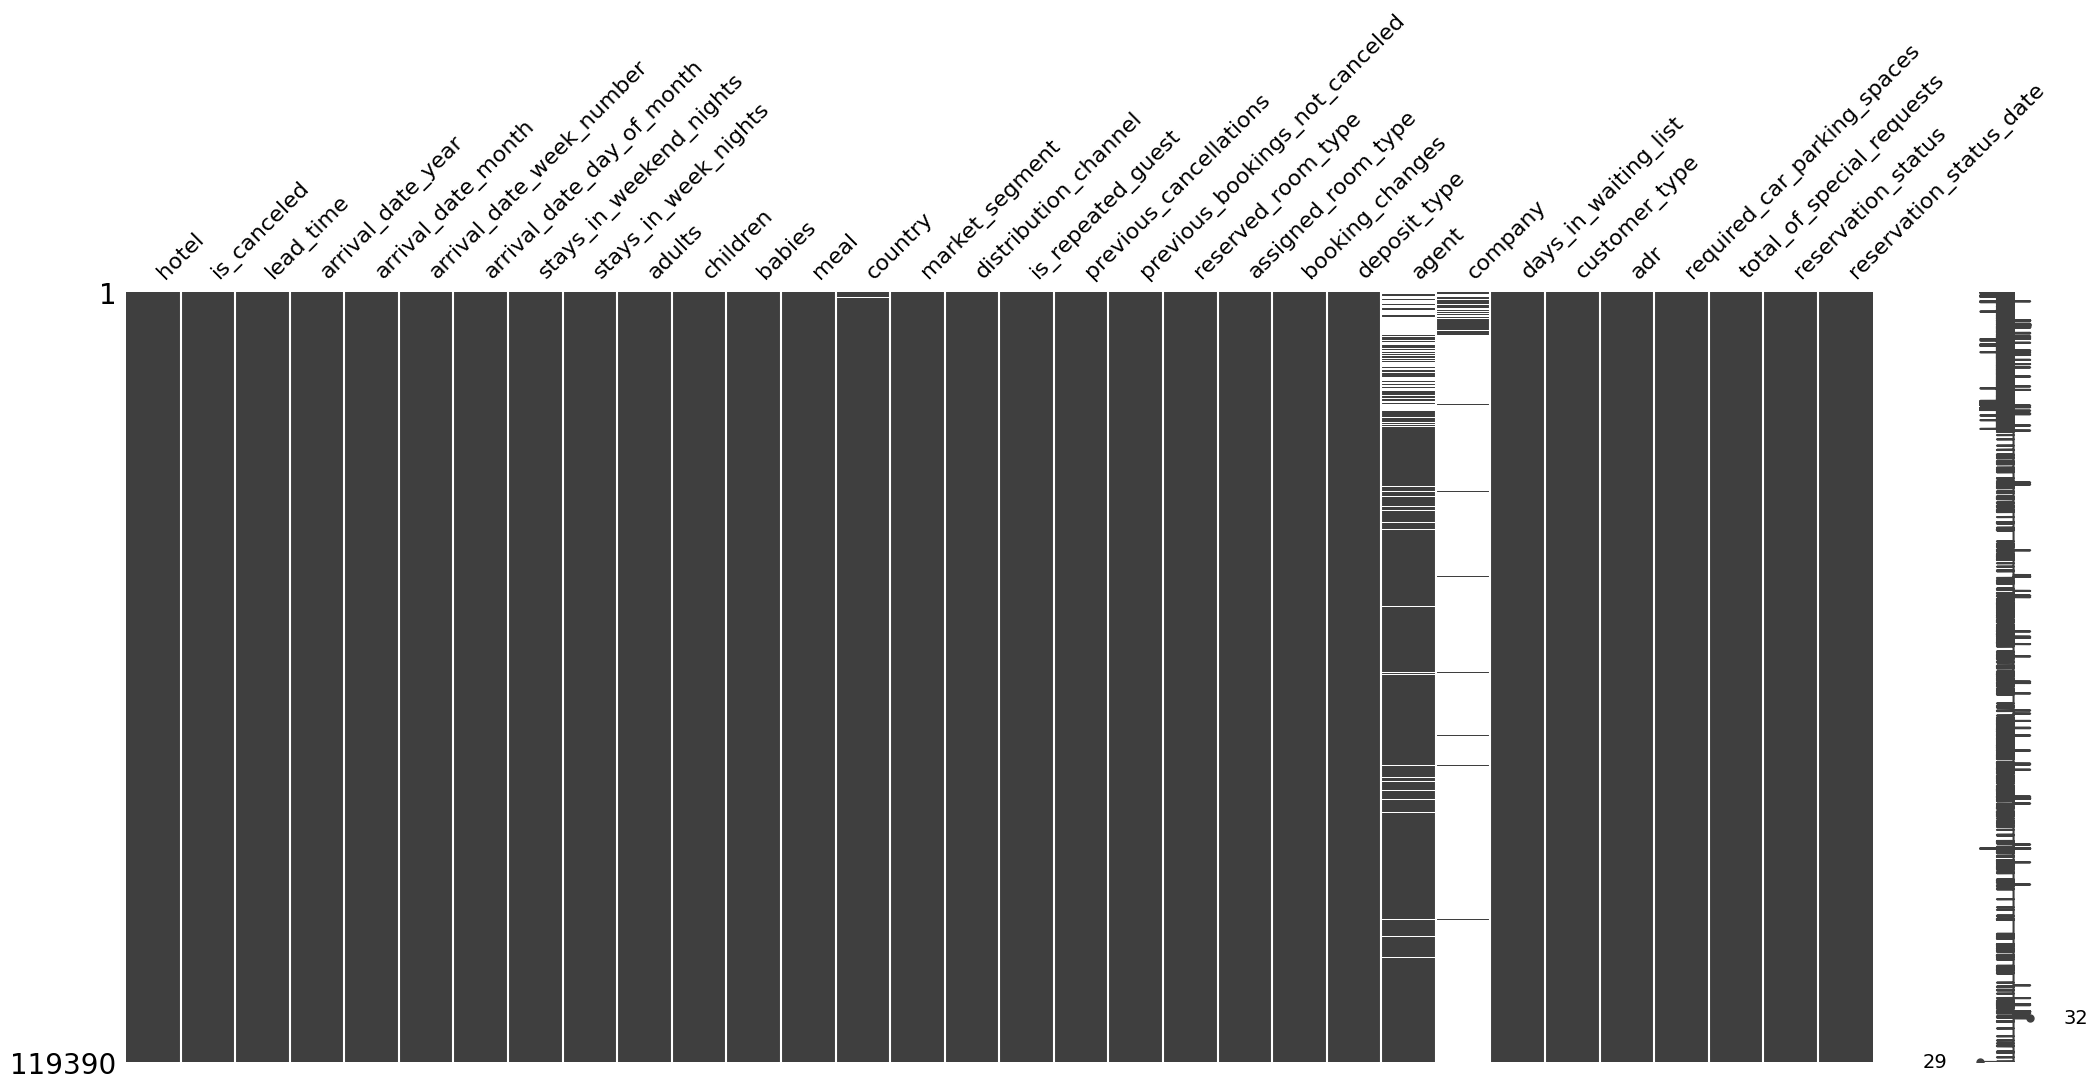

In [65]:
#Checking if missing values are a result of market segment
sorted_data = data.sort_values("distribution_channel")
msno.matrix(sorted_data)
plt.show()

Furthermore, the missing values are checked to see if it's a result of different distribution channels.

In [67]:
#Printing the number of missing values in "company" column based on market segment
for i in data.distribution_channel.unique():
    print(f"{i}: {data.loc[data.distribution_channel==i]['company'].isna().sum()}")

Direct: 13841
Corporate: 1594
TA/TO: 96961
Undefined: 5
GDS: 192


In [66]:
#Printing the number of missing values in "company" column based on market segment
for i in data.distribution_channel.unique():
    print(f"{i}: {data.loc[data.distribution_channel==i]['agent'].isna().sum()}")

Direct: 7625
Corporate: 5543
TA/TO: 3167
Undefined: 3
GDS: 2


Once again, there is no reliable pattern after breaking down into different distribution channels. A correlation heatmap for missingness of the variables have been generated.

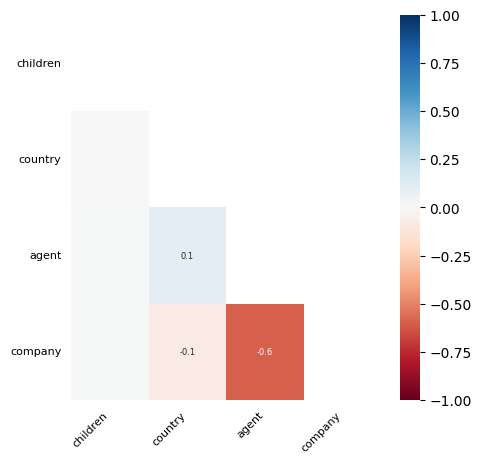

In [56]:
msno.heatmap(data, figsize=(5,5), fontsize=8)
plt.show()

There is a medium negative correlation between "agent" and "company", which suggests that these two variables are MAR.The reason for this can be attributed to the fact that people who book from a travel company will not book from an agency, and vice versa, that's why there's a negative correlation between the two variables. While the variables "children" and "country" can be concluded to be MCAR since there is no correlation observed for these two variables.

### Missing value imputation

There are four features with missing values, which are the 'company', 'agent', 'country' and 'children' column. The 'company' and 'agent' columns represent the ID numbers of the companies or agency the hotel bookings are made through. It is assumed that if the 'company' or 'agent' column is NULL, it means that the booking is not made through a company or agency. Hence, the NULL values with these columns will be replaced with 0. 

In [88]:
#Replacing NULL values in 'company' column with 0
data['company'] = data['company'].fillna(0)

#Replacing NULL values in 'agent' column with 0
data['agent'] = data['agent'].fillna(0)

As for the 'country' column, the mode imputation method will be selected as the 'country' column is a categorical variable. The mode imputation essentially replaces NULL values with the 'country' value with the highest frequency in the dataset (which is PRT in this dataset). 

In [89]:
#Finding the mode of the 'country' column
data.country.mode()

#Replacing NULL values in 'country' column with mode of said column
data['country'] = data['country'].fillna(data.country.mode()[0])

As for the 'children' column, I have identified reserved room type as an indicator of the amount of children for the booking. Certain types of room maybe more suitable for families with children. Hence, the 'reserved_room_type' column is taken into consideration when imputing missing values in 'children' column.

In [90]:
#Displaying reserved room type for bookings with NULL values in 'children' column
data[(data['children'].isnull())]['reserved_room_type']

40600    B
40667    B
40679    B
41160    B
Name: reserved_room_type, dtype: object

In [91]:
#Displaying the mean number of children for different reserved room types
#The numbers are rounded up because the values for 'children' column are all integers
round(data.groupby('reserved_room_type')['children'].mean())

reserved_room_type
A    0.0
B    1.0
C    1.0
D    0.0
E    0.0
F    1.0
G    1.0
H    1.0
L    0.0
P    0.0
Name: children, dtype: float64

Based on the exploratory data analysis, I have determined that the mean number of children for 'reserved_room_type' B is 1.0. As all observations with missing values in 'children' column has reserved room type B, the missing values in the 'children' column will be replaced with values 1. 

In [92]:
#Replacing NULL values in 'children' column with value of 1
data['children'] = data['children'].fillna(1)

After missing values imputation, the dataset is once again checked for missing values. If there are no more missing values, this indicates that the missing values imputation have been successful.

In [93]:
#Checking imputated dataset for missing values
data.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

An additional variable 'guests' is created to show the number of guests in each booking, for easy viewing rather than having to look at the 'adults', 'childrens' and 'babies' column separately.

In [94]:
#Creating 'guests' variable which is defined as the sum of adults, childrens and babies in the booking
data['guests'] = data.adults+data.babies+data.children

In [95]:
#Displaying the number observations for each value in the 'guests' variable
data.groupby('guests')['guests'].count()

guests
0.0       180
1.0     22581
2.0     82048
3.0     10497
4.0      3930
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: guests, dtype: int64

The exploratory data analysis have demonstrated that certain bookings have 0 guests, which could be a source of error. Hence, observations with 0 value in the 'guests' column will be removed from the dataset. The exploratory data analysis also showed that there are rooms with more than 10 guests (up to a maximum of 55 guests). This could also be a potential source of error, but it is also possible that these observations are conference room bookings which could accomodate a larger amount of guests. Hence, observations with more than 10 guests will be retained in the dataset.

In [96]:
#Removing observations with 0 values in the 'guest' columns
data = data[(data['guests']!= 0)]

Furthermore, a 'stay_duration' variable is also created to get a better sense of the duration of stay for each booking instead of having to look at separate columns, 'stays_in_week_nights' and 'stays_in_weekend_nights'.

In [97]:
#Creating 'stay_duration' variable which is defined as the sum of week nights stays and weekend nights stays
data['stay_duration'] = data.stays_in_week_nights+data.stays_in_weekend_nights

c:\Project Directories\Learning\python3.7_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
#Displaying the number of observations for each value in 'stay_duration'
data.groupby('stay_duration')['stay_duration'].count()

stay_duration
0       645
1     21005
2     27632
3     27064
4     17373
5      7771
6      3846
7      8648
8      1155
9       840
10     1135
11      393
12      220
13      141
14      913
15       72
16       40
17       20
18       35
19       22
20       14
21       71
22       13
23        8
24        6
25       37
26        6
27        4
28       34
29       13
30       13
33        3
34        1
35        5
38        1
42        4
45        1
46        1
48        1
56        2
60        1
69        1
Name: stay_duration, dtype: int64

It seems that there are 645 bookings that do not include any nights staying in the hotel. This could be an indicator of conference room bookings which do not involve staying in the hotel overnight.

## Changing data type of columns

In [99]:
#Checking the datatypes of each feature in the dataset
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

The data types of each column in the dataset is inspected. It was found that columns 'children', 'company', 'agent' and 'guests' have data types 'float64' eventhough all the values of the columns are integers. Hence, these columns have been converted to the data type 'int64'. 

In [100]:
#Converting the columns 'children', 'company', 'agent' and 'guests' to int64
data[['children','company', 'agent', 'guests']] = data[['children','company', 'agent', 'guests']].astype('int64')

c:\Project Directories\Learning\python3.7_learning\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Q1. Descriptive analytics and Insights
This section provides general descriptive analytics and insights for the hotel booking dataset.

In [102]:
#Generating descriptive statistics 
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,stay_duration
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104077,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504,1.971244,3.426248
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398869,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876,0.718913,2.540692
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


Firstly, descripive statistics have been generated to get an idea of the distribution of the features in the dataset. From the descriptive statistics generated, it can be observed that the dataset consists of booking from the year 2015 to 2017. The descriptive statistics also shows that the number of guests for hotel bookings varies significantly, ranging from 1 guest to 55 guests. Furthermore, the stay duration for hotel bookings also vary significantly from 0 nights to 69 nights. 

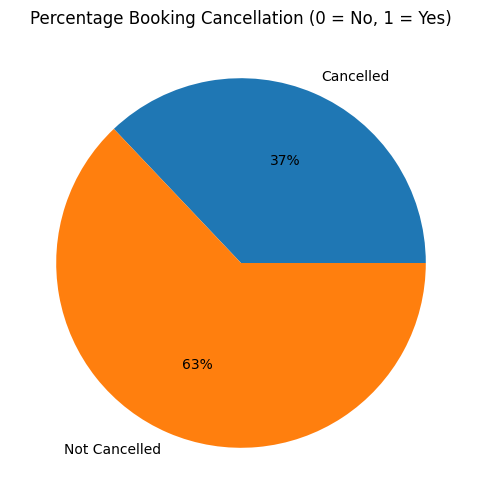

In [103]:
#Plotting a pie chart to demonstrate the cancellation rate of the hotel bookings
cancelled = data[(data['is_canceled'] == 1)].count()[0]
not_cancelled = data[(data['is_canceled'] == 0)].count()[0]

plt.figure(figsize = (6,6))
plt.pie([cancelled, not_cancelled], labels = ['Cancelled', 'Not Cancelled'], autopct = '%.0f%%')
plt.title('Percentage Booking Cancellation (0 = No, 1 = Yes)')

plt.show()

A pie chart was generated to demonstrate the cancellation rate of hotel bookings for this particular hotel. It can be observed that 37% of the bookings for this hotel ended up with cancellation, while 63% of the bookings do not end up being cancelled. 

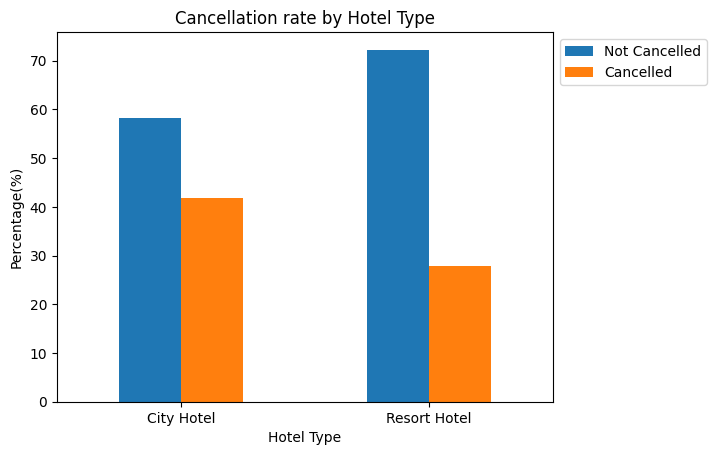

In [104]:
#Plotting the cancellation rate of hotel bookings by hotel type
(data.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100).unstack().plot.bar()

plt.title('Cancellation rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage(%)')
plt.xticks(rotation = 360)
plt.subplot().legend(loc='upper left', bbox_to_anchor = (1,1), labels = ['Not Cancelled', 'Cancelled'])

plt.show()

A bar chart was generated to demonstrate the cancellation rate of hotel bookings by hotel type. The bar chart shows that the cancellation rate of city hotel is higher than resort hotel. This indicates that bookings made for city hotel has a higher possibility of cancellation compared to the bookings made for resort hotel. 

In [105]:
import datetime

#Defining a function to convert month name to number
def convert_month_name_to_number(month):
  datetime_object = datetime.datetime.strptime(month, "%B")
  month_number = datetime_object.month
  return(month_number)

#Creating a new variable 'arrival_date_month_number' using the function defined
data['arrival_date_month_number'] = data['arrival_date_month'].apply(lambda x: convert_month_name_to_number(x))

c:\Project Directories\Learning\python3.7_learning\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In order to visualize the cancellation rate by month of arrival, the month index need to be sorted in order. However, this is difficult to achieve using the names of the month. Hence, a new variable 'arrival_date_month_number' is created where the values are the number equivalent of the month name for all observations. 

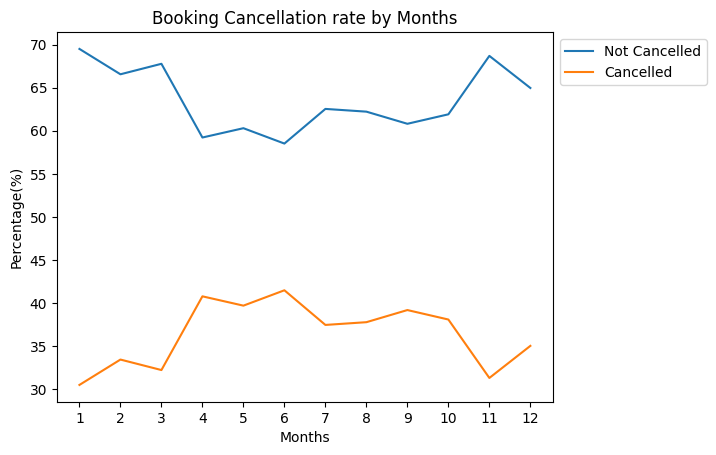

In [106]:
#Plotting cancellation rate by month
(data.groupby('arrival_date_month_number')['is_canceled'].value_counts(normalize=True)*100).unstack(level=1).plot.line()

plt.title('Booking Cancellation rate by Months')
plt.xlabel('Months')
plt.ylabel('Percentage(%)')
plt.xticks(range(1,13))
plt.subplot().legend(loc='upper left', bbox_to_anchor = (1,1), labels = ['Not Cancelled', 'Cancelled'])

plt.show()

A line chart is plotted to display the percentage cancellation of hotel bookings by months. As shown in the line chart, the month where the cancelation rate is highest is June for the three year period between 2015 to 2017.

In [107]:
#Create new variable 'stay_duration_bin' by binning the values in 'stay_duration' variable
data['stay_duration_bin'] = pd.cut(data['stay_duration'], [-1, 10, 30, 69], labels = ['short', 'medium', 'long'])

#Display new variable 'stay_duration_bin'
data['stay_duration_bin']

c:\Project Directories\Learning\python3.7_learning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         short
1         short
2         short
3         short
4         short
          ...  
119385    short
119386    short
119387    short
119388    short
119389    short
Name: stay_duration_bin, Length: 119210, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

A new variable 'stay_duration_bin' is created by binning the values in 'stay_duration' variable. This is because it is hard to visualise the cancelation rate by 'stay_duration' with the variation of values in the 'stay_duration' variable. 

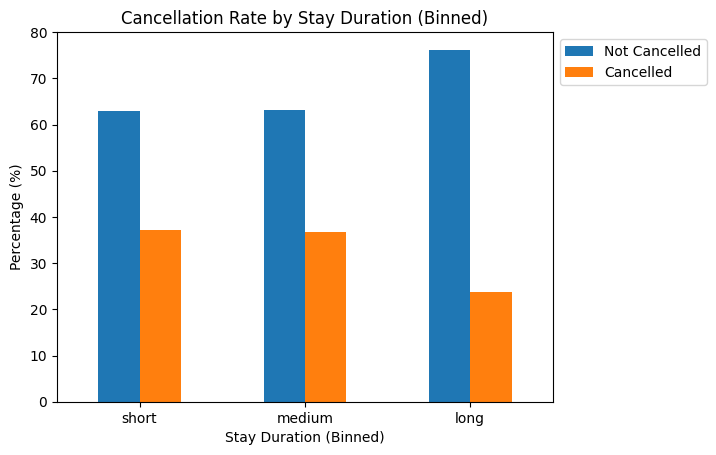

In [108]:
#Plotting the cancellation rate by the stay duration (binned)
(data.groupby('stay_duration_bin')['is_canceled'].value_counts(normalize=True)*100).unstack(level=1).plot.bar()

plt.title('Cancellation Rate by Stay Duration (Binned)')
plt.xlabel('Stay Duration (Binned)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=360)
plt.subplot().legend(loc='upper left', bbox_to_anchor = (1,1), labels = ['Not Cancelled', 'Cancelled'])

plt.show()

A bar graph is plotted to display the cancellation rate of hotel bookings by the stay duration (binned). As shown in the bar graph, the cancellation rate for short and medium duration stays are largely similar, while the cancellation rate for long duration stays are much lower. 

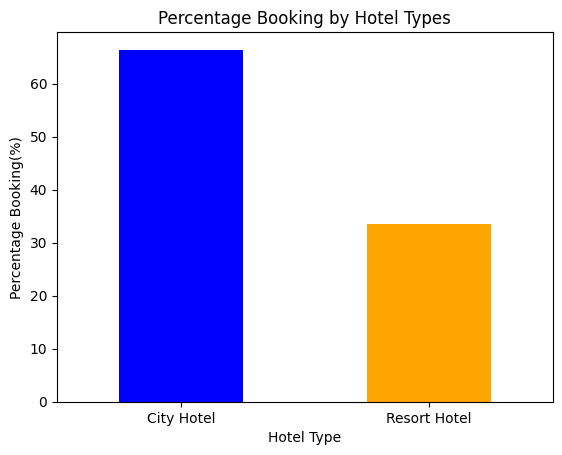

In [109]:
#Plotting the percentage booking for different hotel types
(data['hotel'].value_counts(normalize=True)*100).plot.bar(color = ['blue', 'orange'])

plt.title('Percentage Booking by Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage Booking(%)')
plt.xticks(rotation=360)

plt.show()

A bar chart was generated to demonstrate the booking percentage for various hotel types. The bar chart demonstrated that more than 60% of the bookings were made for the city hotel, while the rest of the bookings were made for the resort hotel.


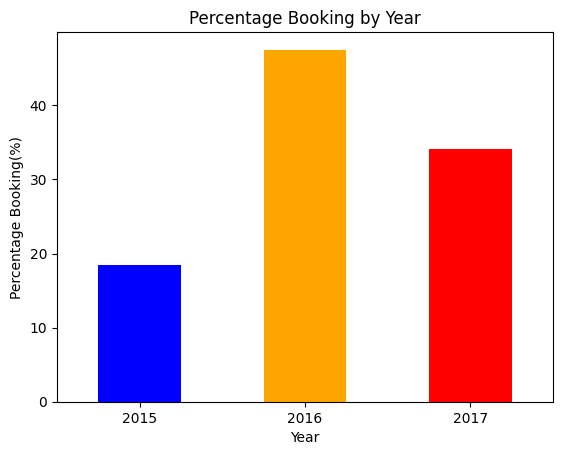

In [110]:
#Plotting the percentage booking by year
(data['arrival_date_year'].value_counts(normalize=True)*100).sort_index().plot.bar(color = ['blue', 'orange', 'red'])

plt.title('Percentage Booking by Year')
plt.xlabel('Year')
plt.ylabel('Percentage Booking(%)')
plt.xticks(rotation=360)

plt.show()

A bar chart was generated to display the percentage booking by year. The bar chart demonstrated that year 2015 have the lowest amount of booking in the three year period, while year 2016 has the highest amount of booking in the three year period. The booking amount more than doubled from year 2015 to 2016, while the booking amount decreased by approximately 15% from year 2016 to 2017.

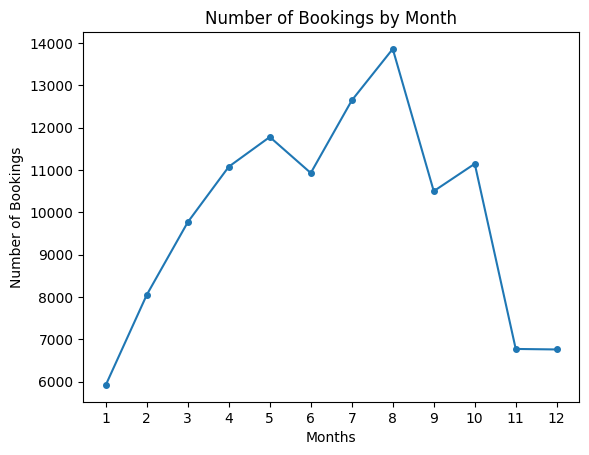

In [111]:
data['arrival_date_month_number'].value_counts().sort_index().plot.line(marker = '.', markersize = 8)

plt.xticks(ticks = range(1,13))
plt.title('Number of Bookings by Month')
plt.xlabel('Months')
plt.ylabel('Number of Bookings')

plt.show()

A line chart is generated to show the booking trend throughout the months in the three year period. According to the line chart, the number of bookings is slow at the start of the year and slowly increases with month until May, when there's a decrease in bookings observed in June. Following that, the number of bookings increases until it reaches a peak in August and slowly decreases after that. A slight increase in booking can be observed in October, then the number bookings decreases until December.

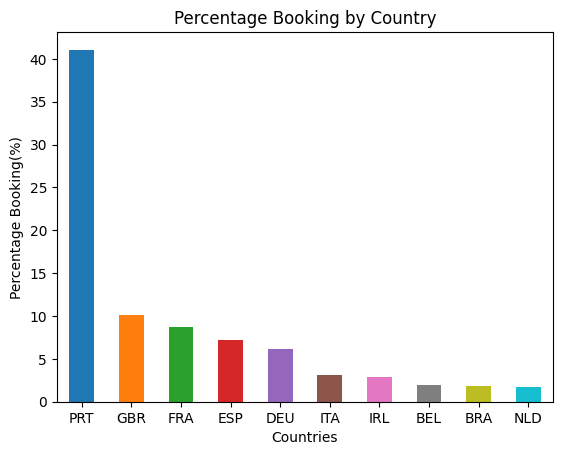

In [112]:
#Plotting number of bookings by country (only top 10 countries with highest number of bookings included)
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
         'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

(data['country'].value_counts(normalize = True)*100)[:10].plot.bar(color = color)

plt.title('Percentage Booking by Country')
plt.ylabel('Percentage Booking(%)')
plt.xlabel('Countries')
plt.xticks(rotation = 360)

plt.show()

A bar chart is plotted to show the percentage of bookings by country. As shown in the bar chart, more than 40% of the bookings come from the country Portugal. This needs to be interpreted carefully, as the missing values in 'country' column was imputated with 'PRT' value. This could possibly be the reason why Portugal has such a high percentage booking compared to other countries. Furthermore, the top 5 countries in terms of percentage booking are all in Europe, which suggests that this hotel is a European hotel. 

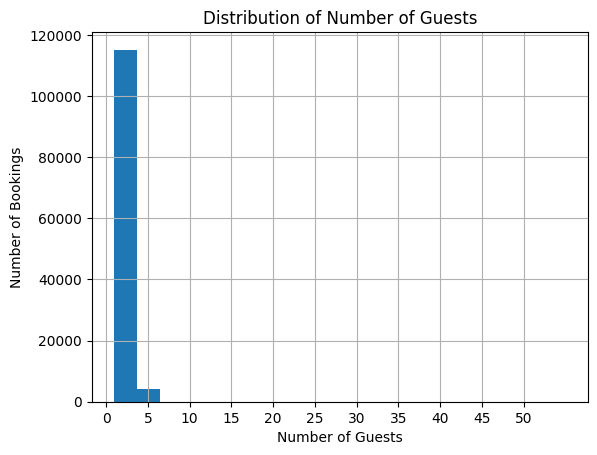

In [113]:
#Plotting distribution of number of guests for hotel bookings
data['guests'].hist(bins = 20)

plt.title('Distribution of Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Number of Bookings')
plt.xticks(range(0,51,5))

plt.show()

A histogram was generated to display the distribution of number of guests for hotel bookings. The histogram has shown that majority of the bookings has 5 guests or less.

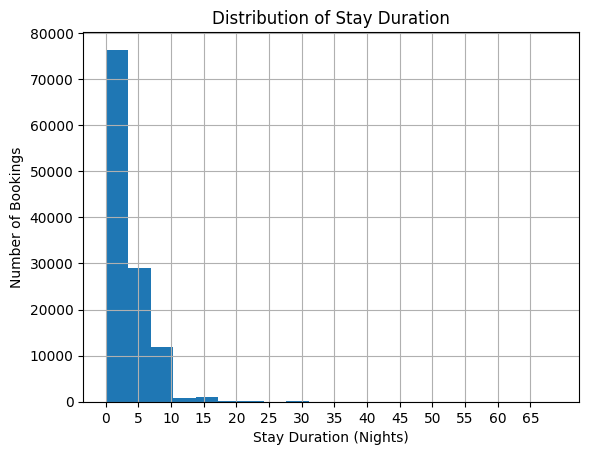

In [114]:
#Plotting distribution of stay duration for hotel bookings
data['stay_duration'].hist(bins = 20)

plt.title('Distribution of Stay Duration')
plt.xlabel('Stay Duration (Nights)')
plt.ylabel('Number of Bookings')
plt.xticks(range(0,70,5))

plt.show()

Another histogram is generated to display the distribution of stay duration for the hotel bookings. The histogram has shown that majority of the hotel bookings has a stay duration of between 0 to 5 nights. 

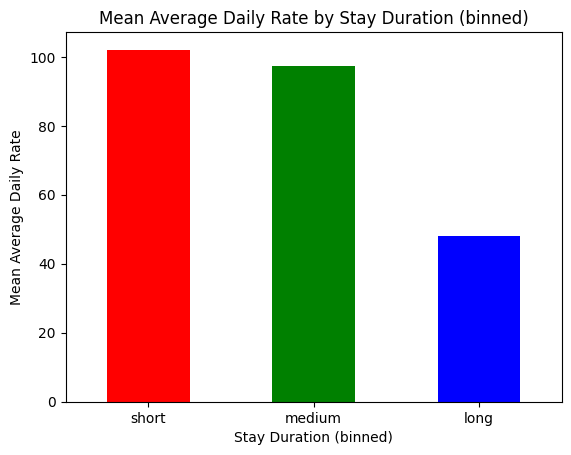

In [115]:
#Plotting mean 'average daily rate' by stay duration
data.groupby('stay_duration_bin')['adr'].mean().plot.bar(color = list('rgb'))

plt.title('Mean Average Daily Rate by Stay Duration (binned)')
plt.xlabel('Stay Duration (binned)')
plt.ylabel('Mean Average Daily Rate')
plt.xticks(rotation=360)

plt.show()

A bar graph is plotted to display the mean average daily rate for hotel bookings by stay duration. As shown in the bar graph, short duration stay in the hotel incurs the highest average daily rate, followed by medium duration stay, while long duration stays incurs the lowest average daily rate. 

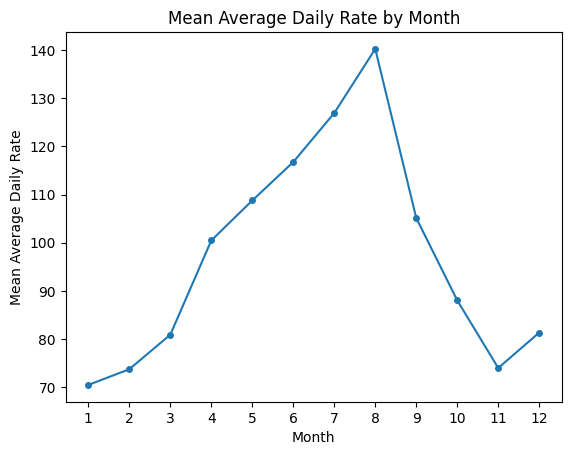

In [116]:
#Plotting mean average daily rate by month
data.groupby('arrival_date_month_number')['adr'].mean().plot.line(marker = '.', markersize = 8)

plt.title('Mean Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Mean Average Daily Rate')
plt.xticks(range(1,13))
plt.show()

A line graph was plotted to display the mean average daily rate for hotel bookings by month. As shown in the line graph, the highest mean average daily rate falls in the month of August, while the lowest mean average daily rate falls in the month of January. This indicates that a consumer can get the best price for hotel bookings if they make the booking for January. The mean average daily rate appears to be closely associated to the number of bookings, as the mean average daily rate is highest when the number of bookings is highest (which is August) and the mean average daily rate is lowest when the number of bookings is lowest (which is January). 

## Q2. Hotel Owner Data Science Use Cases

There are a lot of examples of data science use cases which can be applied to this hotel booking dataset from the hotel owner's perspective. Some of the examples are as below:

1.   Use statistical analysis (e.g., T-tests, chi-square analysis, regression analysis or ANOVA) to identify what factors are significantly associated to hotel booking cancellations. This allows the hotel owner to identify what are the crucial factors to consider to identify any cancellations.
2.   Use data visualisations to gain different insights to the hotel bookings (e.g., identify the peak months where the number of hotel bookings is the highest). This allows the hotel owner to identify where the demand is highest so the owner can hire enough manpower to deal with the high traffic of guests.
3.   Use cluster analysis to identify different segments of guests and the characteristics of the different segments of guests. This would aid the hotel owner in their marketing initiatives, as different marketing campaigns can be curated to different segments of guest to increase conversion rate.
4.   Use machine learning or deep learning algorithms to build a classification model to predict whether a new booking is likely to cancel. This would allow the hotel owner to identify which guest is likely to cancel, so they can take this into consideration when allocating manpower and resources. 




## Q3. Guest Use Data Science Use Cases
I have also identified multiple data science use cases which can be applied to this hotel booking dataset from the guest's perspective. Some of the data science use cases have been listed below:

1.   Use statistical analysis or data visualisation to determine which booking distribution channel provides the best average daily rate for hotel bookings. This would help the guests determine which channel (e.g., travel agents or tour operators) to book the hotel stay for the best price.
2.   Use statistical analysis or data visualisation to determine what time of the year the hotel has the lowest average daily rate for hotel bookings. This is to help the guests identify the best time to book a stay in this hotel to get the best price.
3.   Use statistical analysis or data visualisation to determine the relationship between stay duration and average daily rate for hotel bookings. This is to help the guests identify the optimal length of stay which provides the best price.
4.   Use statistical analysis or data visualisation to determine the whether the average daily rate for hotel booking differs for weekday nights and weekend nights. This would help the guests make a decision on whether to book a stay at the hotel during week days or weekends to get the best price possible. 



Predicting booking cancellations is a classification problem, as the outcomes can only be either 0 (not cancelled) or 1 (cancelled). The decision tree is employed to build a prediction model because it is commonly employed for classification problems. Before modelling, the dataset is split into train and test set (with a ratio of 70:30) where the train set will be used to train the model while the test set will be used to validate the model built. A stratified train test split is employed to ensure the distribution of the target variable is similar in the train and test set.

## Feature selection and feature engineering

In this section, I will be selecting the relevant features to be used to build the prediction models in the following sections and dropping the irrelevant features. Firstly, I will make a copy of the dataset.

In [117]:
#Make a copy of the dataset
data_subset = data.copy()

I will create a new column, 'room_changes', with values of either 0 or 1, where value of 0 represents the reserved room type equals to the assigned room type while a value of 1 represents the reserved room type does not equal to the assigned room type.

In [118]:
#Initialize column with all values being 0
data_subset['room_changes'] = 0

#Observations where reserved room type does not equal to assigned room type, 'room_changes' column will be assigned a value of 1
data_subset.loc[data_subset['reserved_room_type'] != data_subset['assigned_room_type'], 'room_changes'] = 1

I will remove the columns 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month_number', 'reservation_status_date' because the dates do not provide any useful information for prediction models. Following that, I will also remove columns, 'guests', 'stay_duration' and 'stay_duration_bin' as these columns are only created for visualisation purposes in the earlier sections. The 'reserved_room_type' and 'assigned_room_type' columns will also be removed as the information is represented by the newly created 'room_changes' column. Finally, I will also remove 'reservation_status' because this contains information about cancelled bookings which we are trying to predict.

In [119]:
#Removing unnecessary columns
data_subset = data_subset.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month',
                                'arrival_date_month_number', 'guests', 'stay_duration', 'stay_duration_bin', 'reserved_room_type',
                                'assigned_room_type', 'reservation_status', 'reservation_status_date'], axis = 1)

After that, the categorical features in the dataset will be label encoded. Label encoding was chosen, instead of one hot encoding because there is already quite a number of features in the dataset. Furthermore, some categorical features contains a lot of categories, such as the 'country' feature. If one hot encoding is applied, the number of features will increase significantly which will result in increased memory consumption when building the prediction model.

In [120]:
data_subset.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
deposit_type                       object
agent                               int64
company                             int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [121]:
from sklearn import preprocessing

#Listing the categorical features
categorical_features = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']

#Defining label encoder
label_encoder = preprocessing.LabelEncoder()

#Label encoding categorical features
data_subset[categorical_features] = data_subset[categorical_features].apply(lambda x: label_encoder.fit_transform(x))

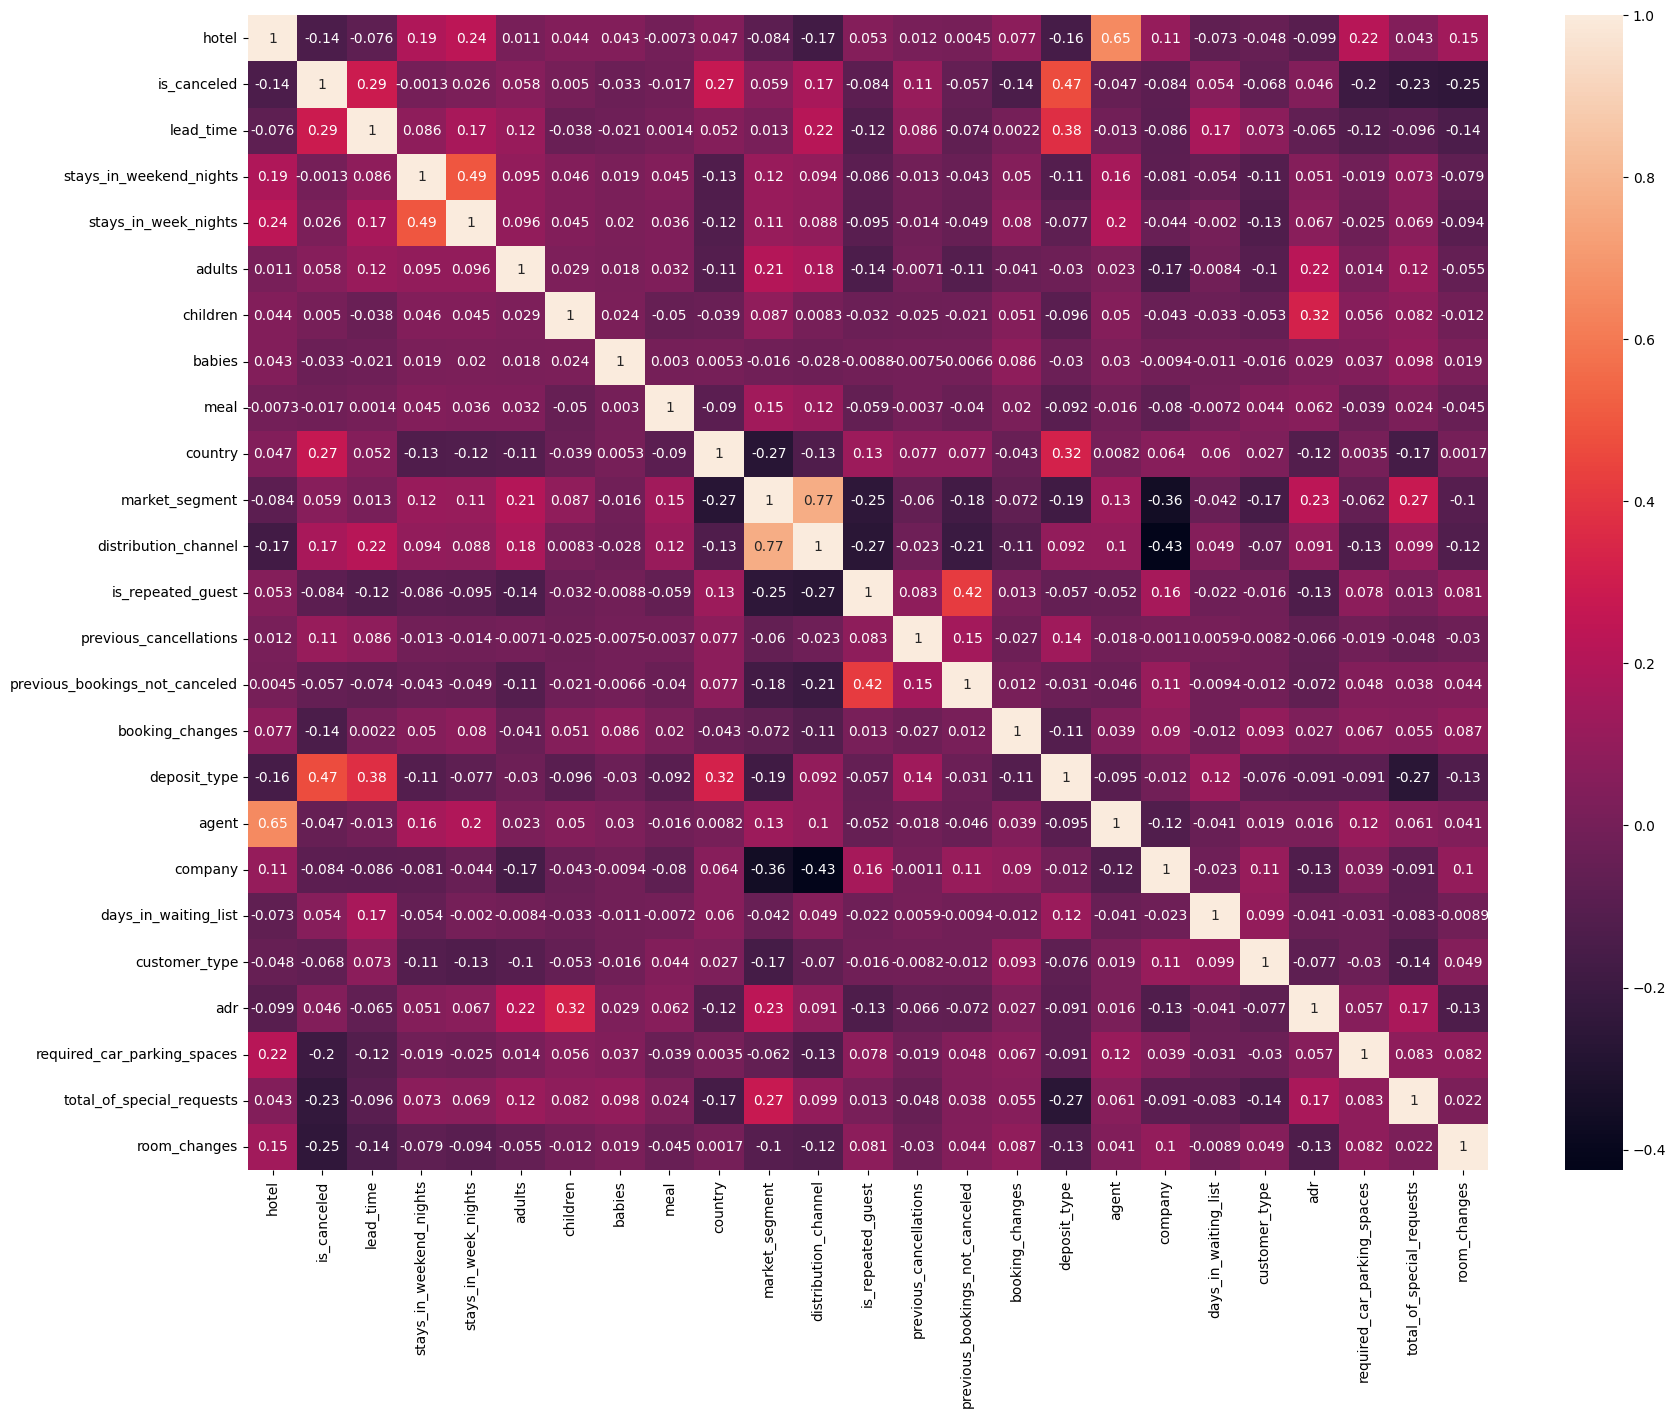

In [122]:
#Generating a heatmap to determine the correlation between features
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_subset.corr(), annot = True, ax=ax);

A heatmap is generated to determine whether there is any strong correlation between the features. Any features with correlation coefficient of 0.9 and above can be considered for removal. As shown in the heatmap, none of the features have correlation higher than 0.9. Hence, all features are retained 

## Q4. Predicting booking cancellations

In [123]:
from sklearn.model_selection import train_test_split

#Train test split with a ratio of 70:30
train, test = train_test_split(data_subset, random_state = 7, stratify = data_subset['is_canceled'], test_size = 0.3)

#Separating x and y in the train and test set
x_train = train.drop('is_canceled', axis = 1)
y_train = train['is_canceled']
x_test = test.drop('is_canceled', axis = 1)
y_test = test['is_canceled']

After the train test split, a grid search is employed to identify the best hyperparameters for the Decision Tree model. One of the disadvantages of decision tree is that it is prone to overfitting, that's why hyperparameter tuning is vital for a decision tree model. The tuned hyperparameters, include 'criterion', 'max_depth', 'min_samples_leaf', and 'max_features'. The 'criterion' hyperparameter represents the measure of the quality of the split in a decision tree; the 'max_depth' represents the maximum depth of the tree; the 'min_samples_leaf' represents the minimum number of samples in a necessary in a leaf node; while the 'max_features' hyperparameter represents the number of features taken into consideration when looking for the best split. 

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Defining the classifier
classifier = DecisionTreeClassifier(random_state = 7)

#Defining the grid parameters
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 50, 10),
              'min_samples_leaf': range(1, 100, 20),
              'max_features': range(10, 25, 3)
              }

#Conducting grid search
grid = GridSearchCV(classifier, param_grid = param_grid, cv = 10, verbose = 1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 50, 10),
                         'max_features': range(10, 25, 3),
                         'min_samples_leaf': range(1, 100, 20)},
             verbose=1)

The best parameters, resultant from the grid search with 'criterion' of entropy, 'max_depth' of 21, 'max_features' of 22 and 'min_samples_leaf' of 21.

In [125]:
#Displaying the best parameters identified in the grid search
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 22,
 'min_samples_leaf': 21}

Following that, a new decision tree model is built using the best combination of parameters identified from the grid search. 

In [126]:
#Defining the classifier with the best parameters identified
classifier = DecisionTreeClassifier(random_state = 7, criterion='entropy', max_depth = 21, min_samples_leaf = 21, max_features = 22)

#Fitting the classifier to the train data
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, max_features=22,
                       min_samples_leaf=21, random_state=7)

The new decision tree model is used to predict whether the bookings will be cancelled in the test set. 

In [127]:
#Predictions using the decision tree classifier
predictions = classifier.predict(x_test)

A confusion matrix is plotted to show the results of the prediction by the decision tree model. As shown in the confusion matrix, there are a total of 10376 true positives, 20381 true negatives, 2122 false positives and 2884 false negatives.

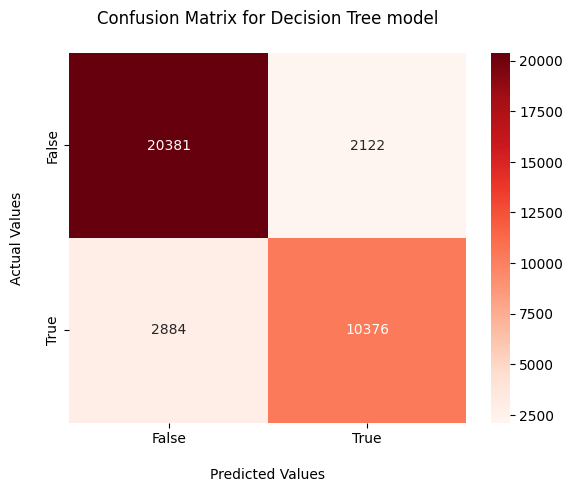

In [128]:
#Generating confusion matrix for the predictions
matrix = confusion_matrix(y_test, predictions)

cm = sns.heatmap(matrix, annot = True, cmap = 'Reds', fmt="d")

cm.set_title('Confusion Matrix for Decision Tree model\n')
cm.set_xlabel('\nPredicted Values')
cm.set_ylabel('Actual Values\n')
cm.xaxis.set_ticklabels(['False', 'True'])
cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()

As shown from the results generated, the accuracy for decision tree model is 86%. However, accuracy may not be the best evaluation metric as there are more observations in the 'not cancelled' class then the 'cancelled' class in the dataset. Hence, the accuracy score could be attributed to the fact that the model predicted most of the majority class accurately. The recall is a good evaluation metric when there's a high cost associated with false negative (incorrectly predicting non-cancellation), while the precision is a good evaluation metric when there's a high cost associated with false positives. The macro average precision and recall scores are chosen because of the class imbalance in the dataset. In the case of hotel booking cancellation prediction, there's a high cost associated with false negatives. Hence, the recall is a good evaluation metric for this scenario. The decision tree model has a macro average recall score of 84% and macro average f-1 score of 85%, which is relatively good. 

In [129]:
#Generating classification report for the predictions
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     22503
           1       0.83      0.78      0.81     13260

    accuracy                           0.86     35763
   macro avg       0.85      0.84      0.85     35763
weighted avg       0.86      0.86      0.86     35763



## Q5. Predicting the number of booking nights 

Predicting the number of booking nights is a regression problem. A decision tree is also used for this scenario as decision trees can also be used for regression problems. Prior to that, a target variable, 'num_booking_nights' which is defined as the sum of 'stays_in_week_nights' and 'stays_in_weekend_nights', is created. Furthermore, the 'stays_in_week_nights' and 'stays_in_weekend_nights' features are removed from the dataset as it contains information of the target variable. 

In [130]:
#Creating target variable, 'num_booking_nights'
data_subset['num_booking_nights'] = data_subset.stays_in_week_nights + data_subset.stays_in_weekend_nights

#Removing 'stays_in_week_nights' and 'stays_in_weekend_nights'
data_subset = data_subset.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis = 1)

Following that, the dataset is split into train and test set with a ratio of 70:30. 

In [131]:
#Train test split with a ratio of 70:30
train, test = train_test_split(data_subset, random_state = 7, test_size = 0.3)

#Separating x and y in the train and test set
x_train = train.drop('num_booking_nights', axis = 1)
y_train = train['num_booking_nights']
x_test = test.drop('num_booking_nights', axis = 1)
y_test = test['num_booking_nights']

After the train test split, the hyperparameters is tuned for the decision tree regressor. Similar to the classifier, the hyperparameters 'max_depth', 'min_samples_leaf' and 'max_features' is tuned. However, instead of 'criterion', the 'splitter' hyperparameter is tuned. The 'splitter' hyperparameter is essentially the strategy used to split the nodes in a decision tree regressor.

In [132]:
from sklearn.tree import DecisionTreeRegressor

#Defining the regressor
regressor = DecisionTreeRegressor(random_state = 7)

#Defining the grid parameters
param_grid = {'splitter': ['best', 'random'],
              'max_depth': range(1, 50, 10),
              'min_samples_leaf': range(1, 100, 20),
              'max_features': range(10, 25, 3)
              }

#Conducting grid search
grid = GridSearchCV(regressor, param_grid = param_grid, cv = 10, verbose = 1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=7),
             param_grid={'max_depth': range(1, 50, 10),
                         'max_features': range(10, 25, 3),
                         'min_samples_leaf': range(1, 100, 20),
                         'splitter': ['best', 'random']},
             verbose=1)

Following that, the best parameters identified from the grid search is displayed

In [133]:
#Displaying the best parameters identified in the grid search
grid.best_params_

{'max_depth': 21,
 'max_features': 16,
 'min_samples_leaf': 21,
 'splitter': 'best'}

A new decision tree regressor is defined using the best parameters identified from the grid search.

In [134]:
#Defining the regressor with the best parameters identified
regressor = DecisionTreeRegressor(random_state = 7, splitter= 'best', max_depth = 21, min_samples_leaf = 21, max_features = 16)

#Fitting the regressor to the train data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=21, max_features=16, min_samples_leaf=21,
                      random_state=7)

The new decision tree regressor is used to predict the number of booking nights in the test set.

In [135]:
#Predictions using the decision tree regressor
predictions = regressor.predict(x_test)

Evaluation metrics such as root mean squared error (RMSE), mean_squared_error (MSE) and mean absolute error (MAE) is generated for the predictions made by decision tree regressor. The RMSE of 1.96 is relatively high as this indicates that the predictions by the decision tree regressor will be off by 2 nights, on average. However, the regression model can be improved by exploring other machine learning or deep learning algorithms (such as linear regression or artificial neural networks) given the time and resources.

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Generating the evaluation metrics 
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('MSE:', mean_squared_error(y_test, predictions))
print('MAE:', mean_absolute_error(y_test, predictions))

RMSE: 1.9621732410391823
MSE: 3.850123827850209
MAE: 1.1867004028975086
